In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import locale
import lxml
from ipywidgets import interact

In [2]:
df = pd.read_excel("https://quality.data.gov.tw/dq_download_xlsx.php?nid=7779&md5_url=ec773ad1a7701ae345fccd6b6495242f")

In [3]:
colname = ['代碼','名稱','介紹','地點','郵遞區號','電話','營業時間','官網','政府網站','照片1','無','照片2','無','照片3','經度','緯度','Class','google map','停車位置']
df.columns = colname

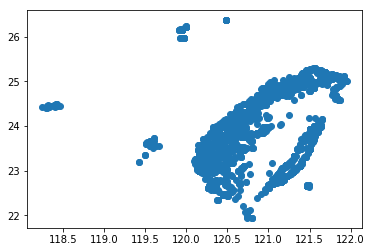

In [4]:
plt.plot(df["經度"],df["緯度"],"o")

In [5]:
value =[]
for i in range(0,len(df["代碼"]),1):
    value.append(str(df['地點'][i])[0:3])

In [6]:
df.insert(4,column="市籍",value=value)

[1, 124, 814, 70, 116, 125, 261, 344, 283, 110, 161, 8, 562, 309, 306, 88, 246, 35, 194, 56, 79, 83]


([<matplotlib.patches.Wedge at 0x1bbc5713978>,
 [Text(1.09999971639995, 0.0007898860866179416, '臺北市'),
  Text(1.0955006358391675, 0.09938992341268786, '桃園市'),
  Text(0.7942551117112527, 0.7610248468483441, '新北市'),
  Text(0.18824660116759373, 1.0837726778014147, '基隆市'),
  Text(0.04224855369991589, 1.0991883640715387, '苗栗縣'),
  Text(-0.14765655624366697, 1.0900447428423574, '新竹市'),
  Text(-0.44030347270071113, 1.0080341521633553, '新竹縣'),
  Text(-0.8236840423955104, 0.7290710516149926, '臺中市'),
  Text(-1.05887477325768, 0.2979668011012253, '彰化縣'),
  Text(-1.0999656848334358, -0.008688624109169178, '雲林縣'),
  Text(-1.077523955541082, -0.2212286718196821, '嘉義縣'),
  Text(-1.0428178802457317, -0.3500440952791507, '嘉義市'),
  Text(-0.8173712271608721, -0.7361414789356256, '臺南市'),
  Text(-0.23166374725289834, -1.0753287442492856, '高雄市'),
  Text(0.25016044033367096, -1.0711768080443416, '花蓮縣'),
  Text(0.539248409726866, -0.9587550013465621, '屏東縣'),
  Text(0.7515610552560055, -0.8032160233850415, '臺東

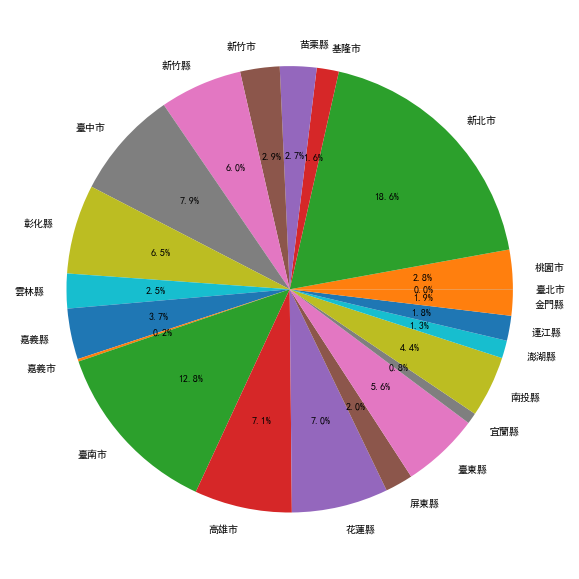

In [55]:
place=["臺北市","桃園市","新北市","基隆市","苗栗縣","新竹市","新竹縣","臺中市","彰化縣","雲林縣","嘉義縣","嘉義市","臺南市","高雄市",'花蓮縣',"屏東縣","臺東縣","宜蘭縣","南投縣","澎湖縣","連江縣","金門縣"]
c = 0
b = []
for a in range(0,len(place)):    
    for i in range(0,len(df["代碼"])):
        if place[a] in df["市籍"][i]:
            c = c+1
    b.append(c)
    c = 0
plt.rcParams['font.sans-serif']=['SimHei']
fig = plt.figure(figsize=(10,15))
labels = place
word_size = b
explode = [0]*len(place) #0則不突凸出，值越大 則凸出越大
plt.pie(word_size, explode= explode, labels = labels, autopct= "%3.1f%%")
# autopct-->項目百分比的格式

In [7]:
def f(place,park,other):
    try:
        for i in range(0,len(df["代碼"])):
            if str(place) in df["市籍"][i] and park == (df["停車位置"].isnull())[i] and str(other) in df["名稱"][i]:
                print(df.iloc[i])   
                print("==========================================================================")
    except TypeError:
        print("no")
    else:
        for i in range(0,10):
            if str(place) in df["市籍"][i] and park == (df["停車位置"].isnull())[i] and str(other) in df["名稱"][i]:
                print(df.iloc[i])
                print("==========================================================================")

In [47]:
interact(f, place=["臺北市","桃園市","新北市","基隆市","苗栗縣","新竹市","新竹縣","臺中市","彰化縣","雲林縣","嘉義縣","嘉義市","臺南市","高雄市",'花蓮縣',"屏東縣","臺東縣","宜蘭縣","南投縣","澎湖縣","連江縣","金門縣"]
        ,park={"yes" : False,"no":True}
        ,other ="請輸入相關名稱");

interactive(children=(Dropdown(description='place', options=('臺北市', '桃園市', '新北市', '基隆市', '苗栗縣', '新竹市', '新竹縣', …

In [42]:
def k(x,y):
    pointx =[]
    pointy = []
    for i in range(0,len(df["代碼"])):
            if (x-float(df["經度"][i]))**2+(y-float(df["緯度"][i]))**2 <= 0.5/100:
                print(df.iloc[i])
                pointx.append(df["經度"][i])
                pointy.append(df["緯度"][i])
                print("==========================================================================")
    plt.plot(x,y,'o')
    plt.plot(pointx,pointy,'o')
    a = 1
    for xy in zip(pointx, pointy):
        plt.annotate("(%s)" % a, xy=xy, xytext=(-20, 10), textcoords='offset points')
        a = a+1

In [21]:
(119.24-116.24)**2 <=0.5/100

False

In [41]:
interact(k,x=(118.24,121.96),y=(21.94,26.37))

interactive(children=(FloatSlider(value=120.1, description='x', max=121.96, min=118.24), FloatSlider(value=24.…

<function __main__.k(x, y)>